In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
   

In [2]:
dataset = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = 'latin1') #Pandas Dataframe to read the given dataset and store it .
dataset.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,31,33,60,61,62,76,79,94,96,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [3]:
dataset.columns.values
#displays all the name of the columns

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [4]:
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)
#renaming the columns in a more understandable format

In [5]:
dataset = dataset[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
#filtering the dataset

In [6]:
dataset.shape#rows and columns

(25487, 18)

In [7]:
dataset.isnull().sum()#to display the number of NULL values in each Coloumns

Year              0
Month             0
day               0
Country           0
State           109
Region            0
City              0
latitude       1262
longitude      1262
Attacktype        0
kill           4968
Wound          6641
target1         296
summary       24455
Group             1
Targettype        0
Weapon            1
motive        24725
dtype: int64

In [8]:
dataset['kill'] = dataset['kill'].fillna(0)
dataset['Wound'] = dataset['Wound'].fillna(0)
#this code is used in order to fill the NULL values as zeroes

In [9]:
dataset['Casualities'] = dataset['kill'] + dataset['Wound']#Adding new Column to show total casualities

In [10]:
dataset.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [11]:
dataset.info()# The Datatypes and Non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25487 entries, 0 to 25486
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         25487 non-null  int64  
 1   Month        25487 non-null  int64  
 2   day          25487 non-null  int64  
 3   Country      25487 non-null  object 
 4   State        25378 non-null  object 
 5   Region       25487 non-null  object 
 6   City         25487 non-null  object 
 7   latitude     24225 non-null  float64
 8   longitude    24225 non-null  float64
 9   Attacktype   25487 non-null  object 
 10  kill         25487 non-null  float64
 11  Wound        25487 non-null  float64
 12  target1      25191 non-null  object 
 13  summary      1032 non-null   object 
 14  Group        25486 non-null  object 
 15  Targettype   25487 non-null  object 
 16  Weapon       25486 non-null  object 
 17  motive       762 non-null    object 
 18  Casualities  25487 non-null  float64
dtypes: f

In [12]:
dataset.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,25487.000000,25487.000000,25487.000000,24225.000000,2.422500e+04,25487.000000,25487.000000,25487.000000
mean,1979.929062,6.223526,15.107859,21.965189,-3.590815e+03,1.752030,1.179268,2.931298
std,3.796787,3.398103,8.910831,24.735465,5.537378e+05,8.544534,10.092463,14.395034
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1978.000000,3.000000,7.000000,10.984639,-8.587080e+01,0.000000,0.000000,0.000000
50%,1981.000000,6.000000,15.000000,24.469722,-5.844443e+01,0.000000,0.000000,0.000000
75%,1983.000000,9.000000,23.000000,41.890961,8.742907e+00,1.000000,0.000000,1.000000
max,1986.000000,12.000000,31.000000,64.837778,1.747763e+02,422.000000,751.000000,760.000000


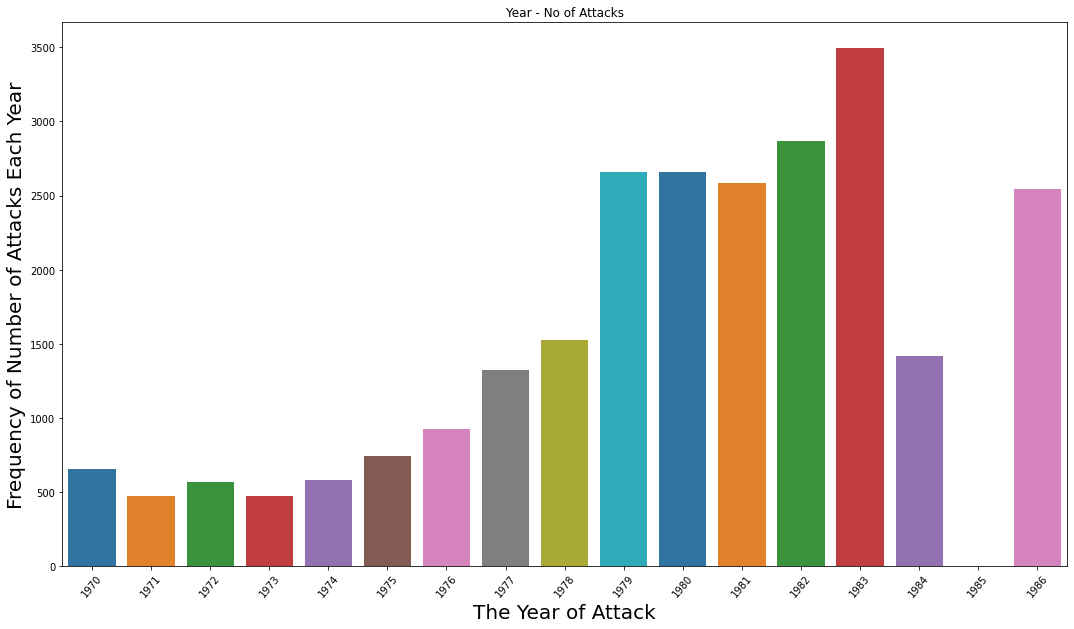

In [13]:
year = dataset['Year'].unique()#To find the unique values in the columns
year_data = dataset['Year'].value_counts(dropna = False).sort_index()#Count the number of unique values in the columna and Sort according to the labels
plt.figure(figsize = (18,10))
sns.barplot(x = year,y = year_data,palette="tab10")#display the bargraph(using the seaborn library)
plt.xticks(rotation = 50)#So that the years dont overwrite on each other
plt.xlabel('The Year of Attack',fontsize = 20)
plt.ylabel('Frequency of Number of Attacks Each Year',fontsize = 20)
plt.title('Year - No of Attacks') 
plt.show()

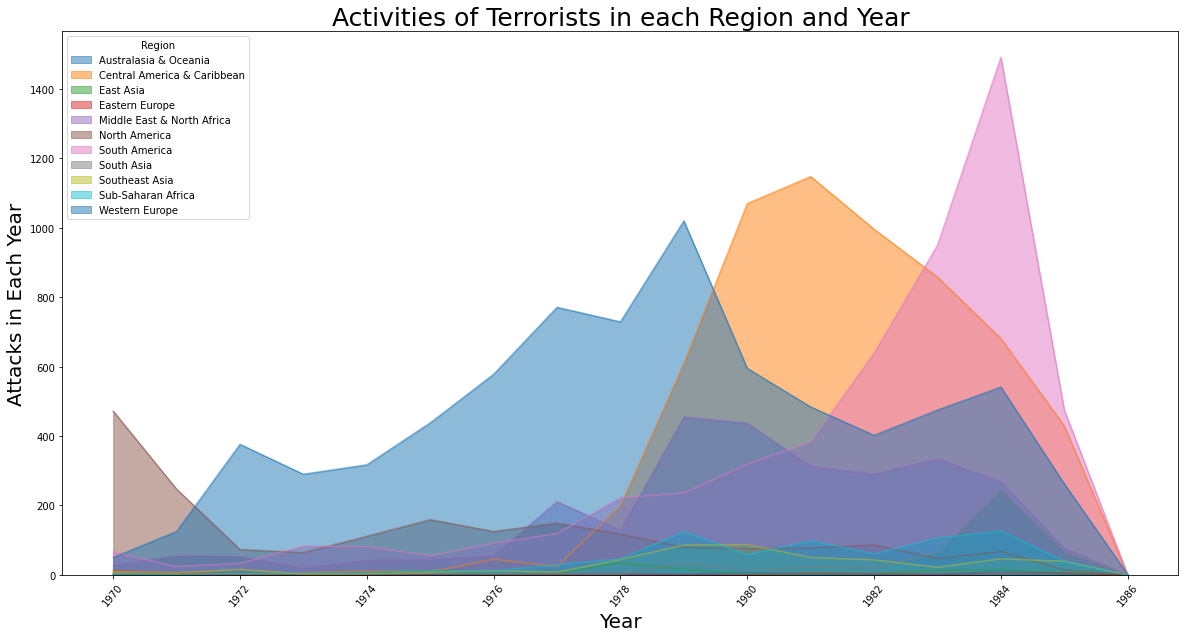

In [14]:
pd.crosstab(dataset.Year,dataset.Region).plot(kind='area',stacked=False,figsize = (20,10))#to do the crosstabulations and the frequency of attacks and shows a area graph
plt.title('Activities of Terrorists in each Region and Year', fontsize = 25)
plt.ylabel('Attacks in Each Year',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.xticks(rotation = 50)
plt.show()

In [39]:
attack = dataset.Country.value_counts()[:10]
attack.values#In order to show number of Attacks in each country

array([3280, 2374, 1896, 1813, 1674, 1606, 1376, 1249, 1139, 1030])

In [16]:
#to find the number of Attacks by each terrorists group
dataset.Group.value_counts()[:10]

Unknown                                             8237
Irish Republican Army (IRA)                         1561
Shining Path (SL)                                   1505
Farabundo Marti National Liberation Front (FMLN)    1447
Basque Fatherland and Freedom (ETA)                  988
Nicaraguan Democratic Force (FDN)                    526
Palestinians                                         471
Revolutionary Armed Forces of Colombia (FARC)        423
M-19 (Movement of April 19)                          358
Movement of the Revolutionary Left (MIR) (Chile)     272
Name: Group, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


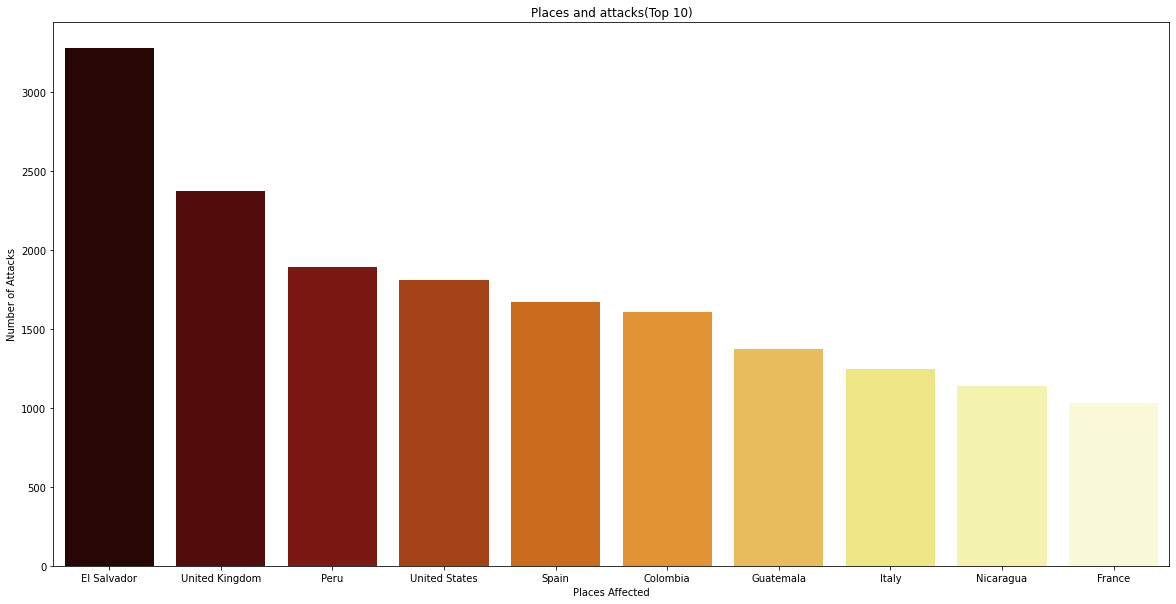

In [17]:
plt.subplots(figsize=(20,10))
sns.barplot(dataset['Country'].value_counts()[:10].index, dataset['Country'].value_counts()[:10].values,palette='afmhot')
#Plotting between each country and its attacks(Top countries attacked)
plt.title('Places and attacks(Top 10)')
plt.xlabel('Places Affected')
plt.ylabel('Number of Attacks')
plt.show()

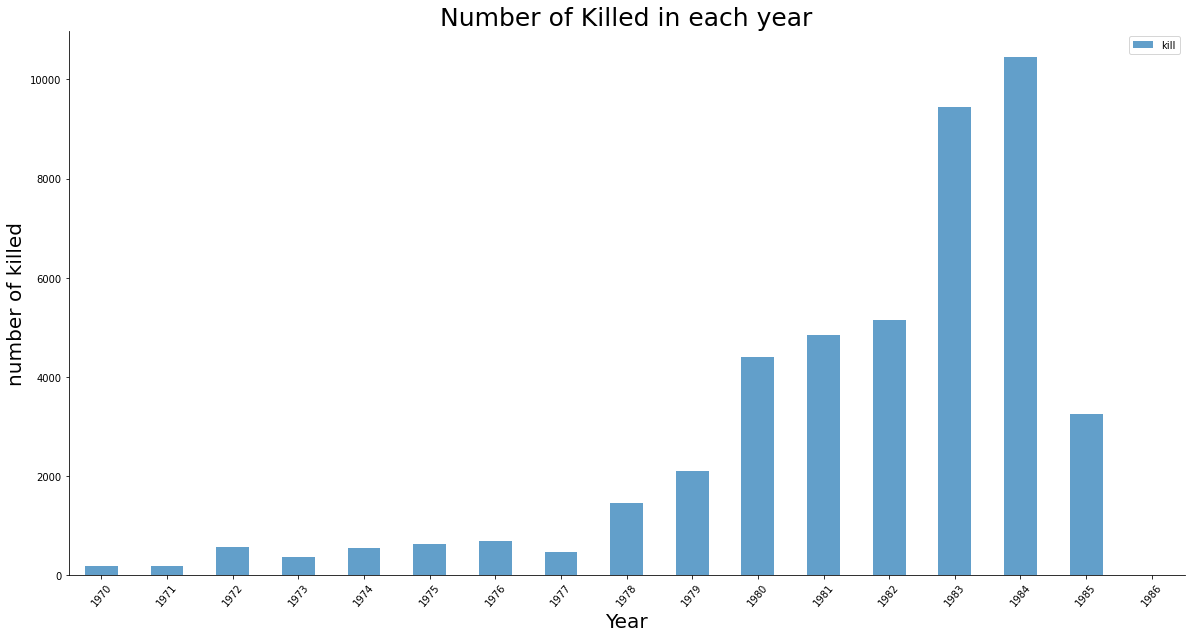

In [18]:
new_data = dataset[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
new_data.plot(kind = 'bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title('Number of Killed in each year',fontsize = 25)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('number of killed',fontsize = 20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

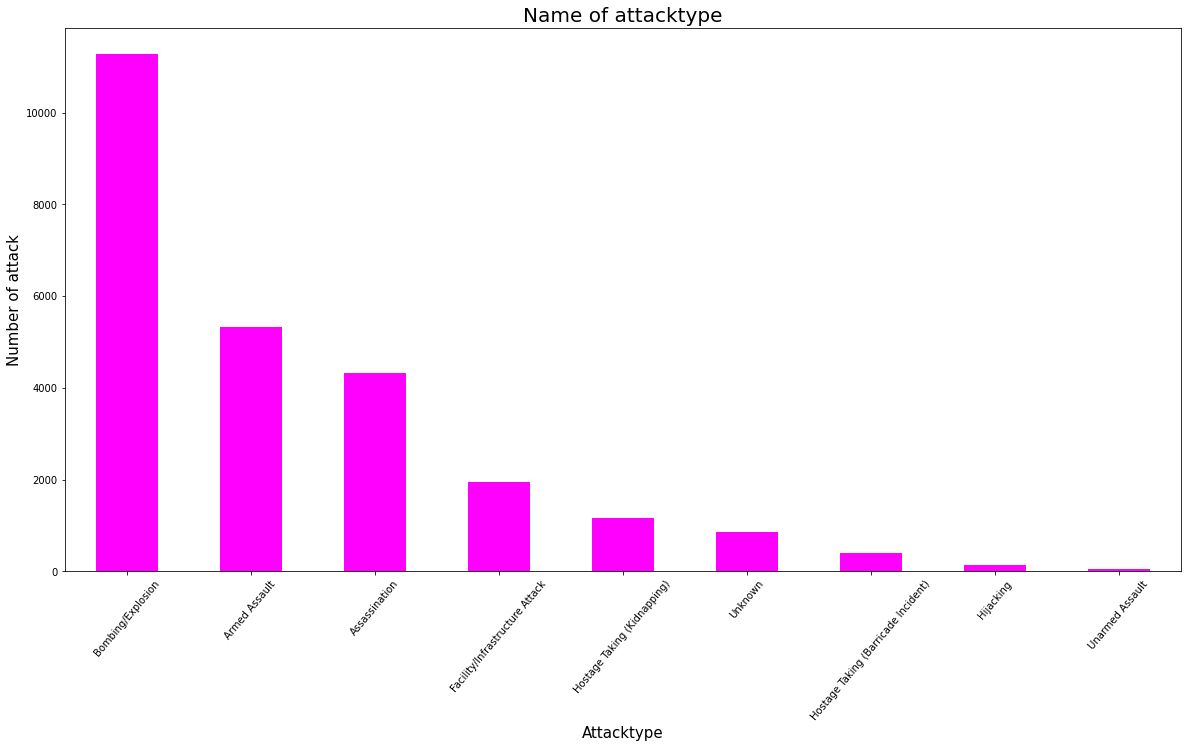

In [19]:
#Calculate each number of attack types and plot a graph
dataset['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()


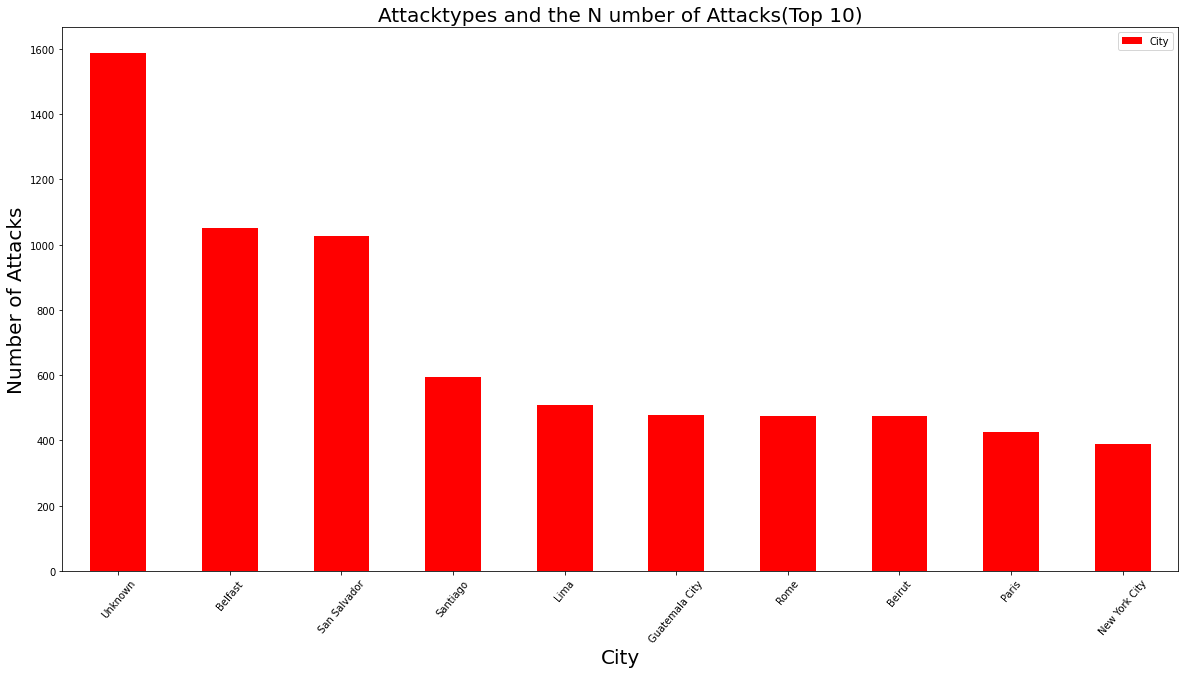

In [20]:
#fetching the number of times there was an attack at City and chaneg into a dataframe
dataset['City'].value_counts().to_frame().sort_values('City',axis = 0,ascending = False).head(10).plot(kind = 'bar',figsize = (20,10),color = 'red')
plt.xticks(rotation = 50)
plt.xlabel('City',fontsize = 20)
plt.ylabel('Number of Attacks',fontsize = 20)
plt.title('Attacktypes and the N umber of Attacks(Top 10)',fontsize = 20)
plt.show()

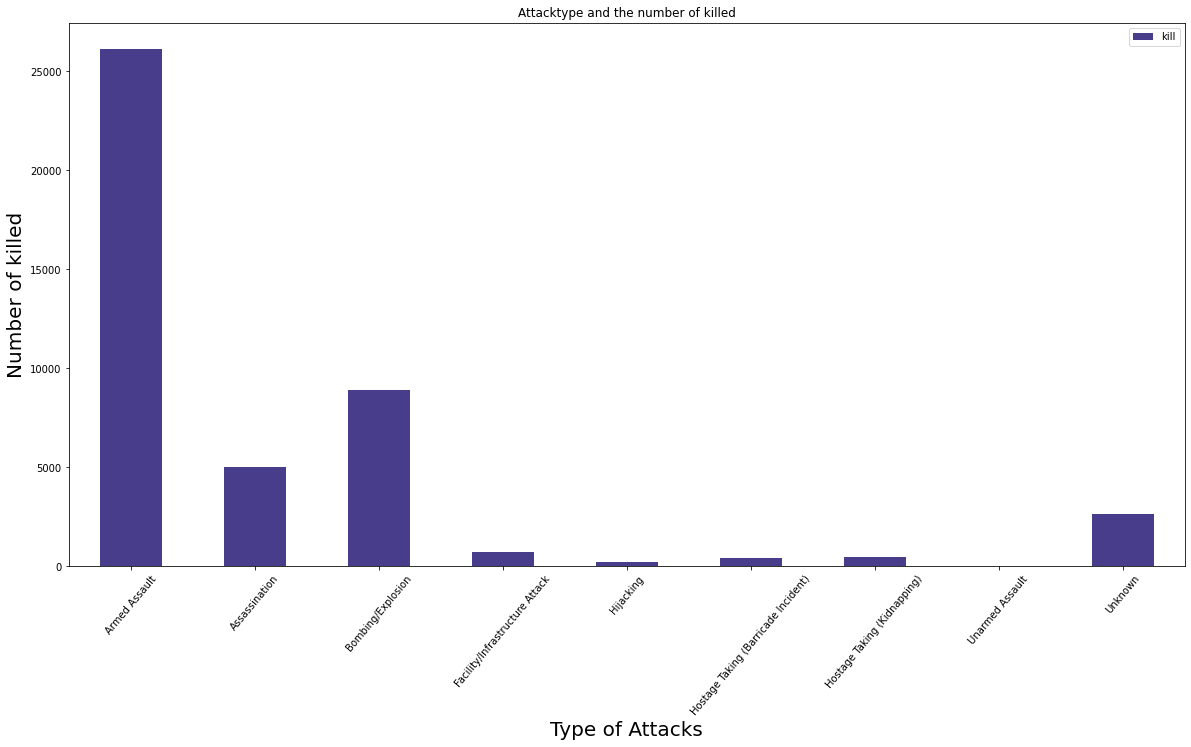

In [21]:
dataset[['Attacktype','kill']].groupby(["Attacktype"],axis = 0).sum().plot(kind = 'bar',figsize = (20,10),color = ['darkslateblue'])
plt.xticks(rotation = 50)
plt.xlabel('Type of Attacks',fontsize = 20)
plt.ylabel('Number of killed',fontsize = 20)
plt.title('Attacktype and the number of killed')
plt.show()

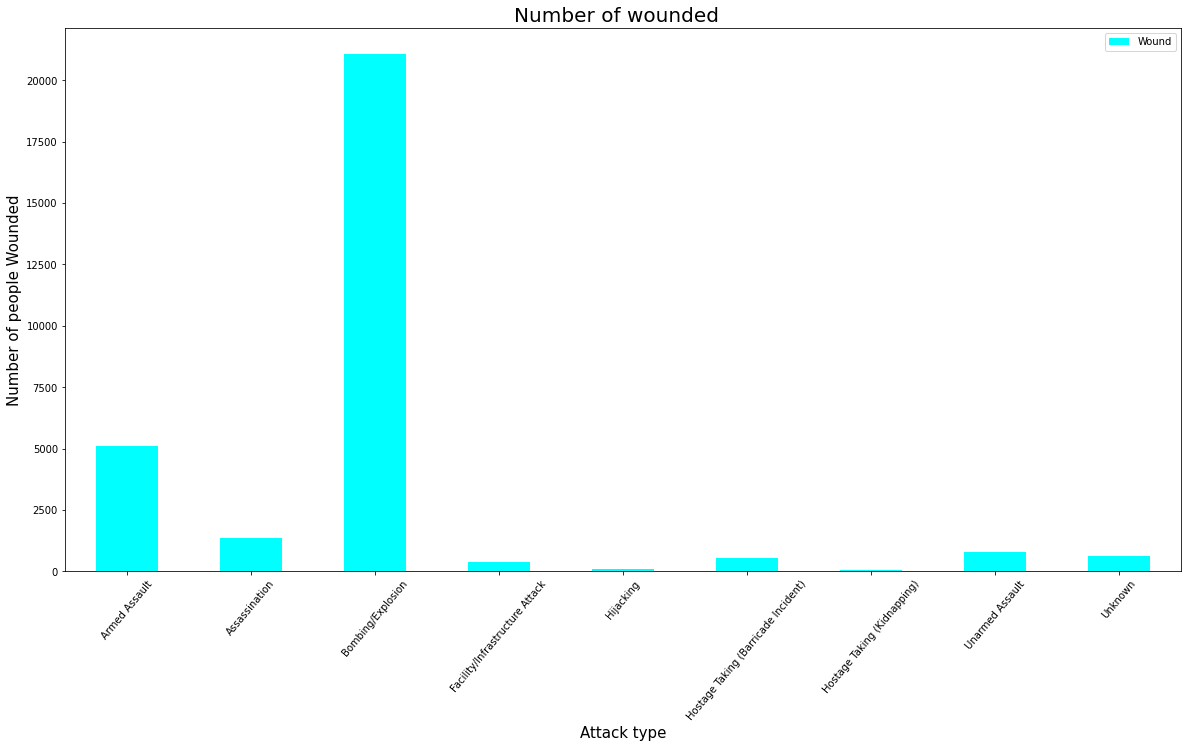

In [22]:
#Each Attacktypes and the wounds
dataset[['Attacktype','Wound']].groupby(['Attacktype'],axis = 0).sum().plot(kind = 'bar',figsize = (20,10),color = ['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people Wounded',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


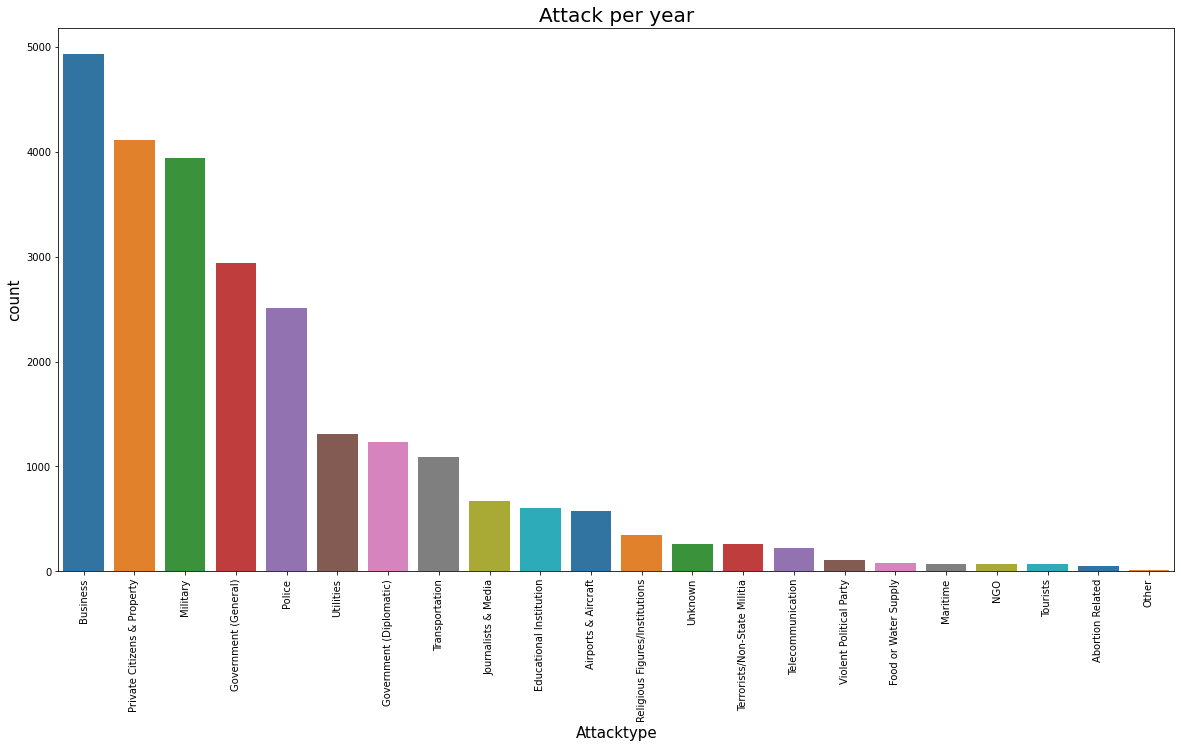

In [23]:
plt.subplots(figsize = (20,10))
sns.countplot(dataset['Targettype'],order = dataset['Targettype'].value_counts().index,palette = 'tab10' )
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

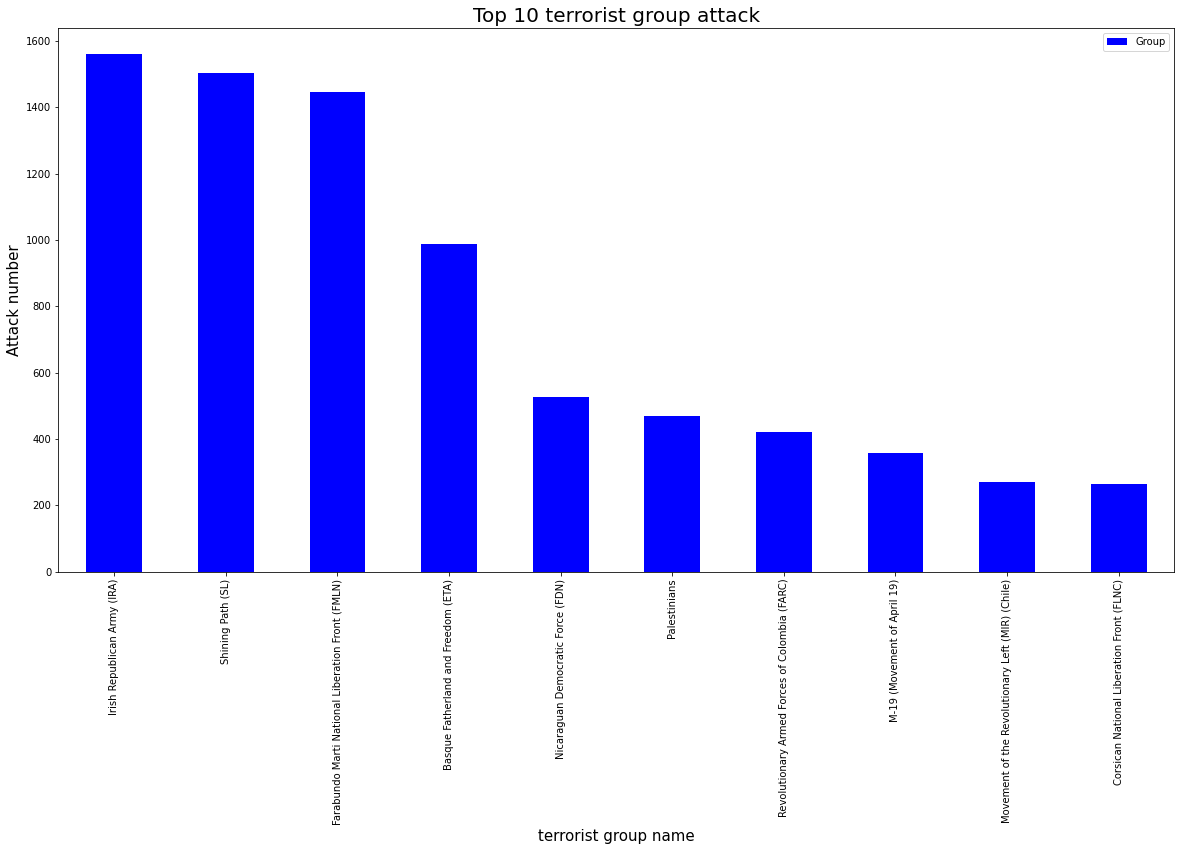

In [24]:

dataset['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='blue',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

In [25]:
#to show the terrorist group and the country and number of kills
df=dataset[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Group,Country,kill
0,Farabundo Marti National Liberation Front (FMLN),El Salvador,5456.0
1,Nicaraguan Democratic Force (FDN),Nicaragua,5356.0
2,Shining Path (SL),Peru,4885.0
3,Democratic Revolutionary Alliance (ARDE),Nicaragua,1686.0
4,Irish Republican Army (IRA),United Kingdom,1303.0
5,Revolutionary Armed Forces of Colombia (FARC),Colombia,1011.0
6,M-19 (Movement of April 19),Colombia,631.0
7,Guerrilla Army of the Poor (EGP),Guatemala,549.0
8,Tamils,Sri Lanka,510.0
9,Mujahedin-e Khalq (MEK),Iran,502.0


In [26]:
kill = dataset.loc[:,'kill']
print('Total number of people killed by terror attack:', int(sum(kill.dropna())))

Total number of people killed by terror attack: 44654


In [27]:
Attacktype_Kills = dataset.pivot_table(columns = 'Attacktype',values = 'kill',aggfunc = 'sum')
Attacktype_Kills

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,26139.0,5005.0,8921.0,754.0,215.0,449.0,481.0,19.0,2671.0


In [28]:
No_of_kills_country = dataset.pivot_table(columns = 'Country',values = 'kill',aggfunc = 'sum')
No_of_kills_country

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Australia,Austria,Bahamas,Bahrain,Bangladesh,Barbados,Belgium,Belize,Bolivia,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Canada,Central African Republic,Chad,Chile,Colombia,Costa Rica,Cyprus,Czechoslovakia,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),Ecuador,Egypt,El Salvador,Ethiopia,Falkland Islands,France,...,Rhodesia,Romania,Saudi Arabia,Senegal,Seychelles,Singapore,Somalia,South Africa,South Korea,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Trinidad and Tobago,Tunisia,Turkey,Uganda,United Arab Emirates,United Kingdom,United States,Uruguay,Vatican City,Venezuela,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,53.0,0.0,0.0,0.0,486.0,331.0,6.0,14.0,0.0,0.0,13.0,73.0,14.0,0.0,13.0,1.0,55.0,0.0,2.0,1.0,4.0,5.0,3.0,0.0,93.0,2349.0,11.0,29.0,26.0,0.0,5.0,3.0,11.0,1.0,13.0,73.0,9299.0,335.0,0.0,145.0,...,217.0,3.0,6.0,0.0,0.0,0.0,1.0,120.0,3.0,81.0,0.0,4.0,643.0,891.0,310.0,0.0,1.0,7.0,50.0,467.0,25.0,1.0,191.0,0.0,41.0,363.0,458.0,121.0,2220.0,228.0,4.0,0.0,46.0,69.0,76.0,0.0,6.0,3.0,5.0,68.0


In [29]:
Regionattacks  = dataset.Region.value_counts()[:1]
Regionattacks

Western Europe    7454
Name: Region, dtype: int64

In [30]:
MonthAttacks = dataset.Month.value_counts()[:1]
MonthAttacks

5    2729
Name: Month, dtype: int64

In [31]:
Attacks = dataset.Attacktype.value_counts()[:1]
Attacks

Bombing/Explosion    11283
Name: Attacktype, dtype: int64

In [32]:
Year = dataset.Year.value_counts()[:1]
Year

1984    3495
Name: Year, dtype: int64

<strong>The Final Conclusions</strong>
<ol>
  <ul>
    <li>Region with most number of attacks:<strong>Middle East & North Africa</strong></li>
    <li>City with most number of attacks:<strong>Baghbad</strong></li>
    <li>Country with most number of attacks:<strong>Iraq</strong></li>
    <li>Year with most number of attacks:<strong>2014</strong></li>
    <li>Month with most number of Attacks:<strong>5</strong></li>
    <li>Group with most number of attacks:<strong>Taliban</strong></li>
    <li>Most number of Attacks Types:<strong>Bombing/Explosion</strong></li>
  </ul>
</ol>

<h1><strong>Assignment 2</strong></h1>

In [72]:
new_data = dataset[['kill','Year']].groupby(['Year']).sum()
new_data

,kill
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0
1975,617.0
1976,674.0
1977,456.0
1978,1459.0


#Creating a Dataframe for Number of casualties and killed more than 500 (binary value)

In [140]:
year_data = dataset.pivot_table(columns = 'Year',values = 'Casualities',aggfunc = 'sum')
year_data = year_data.T.reset_index()
kills = []
for i in range(len(new_data)):
  kills.append(new_data.iloc[i].values)
final_ =[]
for i in kills:
  final_.append(int(i))
print(final_)
killings = []
for i in final_:
  if i > 500:
    killings.append(1)
  else:
    killings.append(0)

year_data["kill(more than 500)binary"] = killings
year_data.drop('Year',
  axis='columns', inplace=True)
X = year_data.iloc[:, :-1].values
y = year_data.iloc[:,-1].values
year_data



[174, 173, 566, 370, 539, 617, 674, 456, 1459, 2100, 4400, 4851, 5136, 9444, 10450, 3244, 1]


,Casualities,kill(more than 500)binary
0,386.0,0
1,255.0,0
2,975.0,1
3,865.0,0
4,1404.0,1
5,1234.0,1
6,1430.0,1
7,974.0,0
8,3059.0,1
9,4606.0,1


#Splitting into Training and Test Set

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Feature Scaling

In [126]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Used Kernal SVM for better accuracy

In [137]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

#Confusion Matrix

In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0]
 [1 3]]


0.8

#K-Fold validation

In [134]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 8)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 62.50 %
Standard Deviation: 33.07 %


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=8.
  % (min_groups, self.n_splits)), UserWarning)
